<a href="https://colab.research.google.com/github/omermehboob/NIDS-using-machine-learning-and-deep-learning/blob/main/DNN_98%25_acc(Binary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print(df.columns.tolist())

['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [1]:
import csv
import os
import sys
import numpy as np
import pandas as pd
import operator
import tensorflow as tf
from tensorflow import keras
##from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Dense
from keras.regularizers import l1
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import normalize
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import TensorBoard
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
import time

In [2]:
dataPath = ""
resultPath = 'results'
if not os.path.exists(resultPath):
    print('result path {} created.'.format(resultPath))
    os.mkdir(resultPath)

In [3]:
def loadData(fileName):
    dataFile = os.path.join(dataPath, fileName)
    df = pd.read_csv(dataFile)
    return df

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
dataPath = "/content/drive/MyDrive"

In [6]:
data = loadData('/content/drive/MyDrive/Refined_data_set(with_label_encoding).csv')

In [7]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [12]:
data = data.drop('Unnamed: 0.1',axis = 1)

In [18]:
data = data.drop('External IP',axis = 1)

In [19]:
print(data.columns)

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [20]:
data = data.astype(dtype = float, )
data = clean_dataset(data)

validation_data = data[0:1000]
validation_data.to_csv('validation_data_IDS.csv')

data = data[1000:]

x_data , y_data = data.drop('Label',axis = 1), data.Label
x_data = preprocessing.normalize(x_data.values)

In [21]:
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1000,31486.0,2265.0,54072.0,2332.0,443.0,6.0,16790.0,10454390.0,7.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1001,58268.0,2259.0,52248.0,4565.0,80.0,6.0,327.0,48.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1002,93546.0,1341.0,50714.0,2956.0,443.0,6.0,5.0,5422046.0,5.0,1.0,...,20.0,74319.0,0.0,74319.0,74319.0,5344876.0,0.0,5344876.0,5344876.0,1.0
1003,39525.0,2264.0,62095.0,2741.0,53.0,17.0,4807.0,29015033.0,2.0,2.0,...,20.0,47870.0,0.0,47870.0,47870.0,28906353.0,0.0,28906353.0,28906353.0,1.0
1004,79417.0,2143.0,55466.0,6311.0,443.0,6.0,199.0,216681.0,58.0,111.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
data.describe()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,...,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06,1.335498e+06
mean,8.322561e+04,1.858388e+03,4.119746e+04,2.513065e+03,8.065433e+03,9.805009e+00,2.819622e+03,1.492469e+07,9.723035e+00,1.088361e+01,...,-2.461230e+03,8.266540e+04,4.085312e+04,1.532511e+05,5.938659e+04,8.599632e+06,5.276820e+05,8.998275e+06,8.188006e+06,8.246152e-01
std,6.690681e+04,1.050944e+03,2.219557e+04,1.567909e+03,1.826860e+04,5.238083e+00,6.232762e+03,3.375027e+07,7.930752e+02,1.055322e+03,...,9.680132e+05,6.374061e+05,3.914297e+05,1.018524e+06,5.631698e+05,2.409250e+07,4.720701e+06,2.484870e+07,2.382192e+07,3.802960e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,1.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.806800e+04,1.340000e+03,3.298925e+04,1.593000e+03,5.300000e+01,6.000000e+00,5.500000e+01,1.510000e+02,2.000000e+00,1.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,5.902200e+04,2.086000e+03,5.093900e+04,2.558000e+03,8.000000e+01,6.000000e+00,1.440000e+02,3.131300e+04,2.000000e+00,2.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.325450e+05,2.209000e+03,5.835200e+04,2.741000e+03,4.430000e+02,1.700000e+01,4.390000e+02,3.383306e+06,5.000000e+00,4.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.492120e+05,8.238000e+03,6.553500e+04,9.697000e+03,6.553400e+04,1.700000e+01,2.599700e+04,1.200000e+08,2.197590e+05,2.919220e+05,...,1.380000e+02,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [23]:
def Model(inputDim):
    model = Sequential()
    model.add(Dense(1024, activation = 'relu' , input_shape = (inputDim,)))
    model.add(Dense(512, activation = 'relu', kernel_regularizer='l1'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(256, activation = 'relu', kernel_regularizer='l1'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1 , activation = 'sigmoid'))
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    return model

In [29]:
def TrainAndTest(x_data, y_data,optimizer='adam',epochs=50, batch_size = 512):
    
    #Creating data for analysis
    time_gen = int(time.time())
    #global model_name
    file_name="IDS_binaryclass"
    model_name = "{}_{}".format(file_name, time_gen)
    #$ tensorboard --logdir=logs/
    #tensorboard = TensorBoard(log_dir='logs/{}'.format(model_name))
    
    X_train , X_test , y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)
    y_train = y_train.values.reshape(y_train.shape[0],1)
    y_test = y_test.values.reshape(y_test.shape[0],1)

    print("X train shape : ", X_train.shape , " y train shape : " , y_train.shape)
      
    model = Model(x_data.shape[1])
    
    history = model.fit(x=X_train,y= y_train, epochs=epochs, batch_size=batch_size,verbose=1)
    
    pred = model.evaluate(X_test, y_test, verbose = 1)
    
    print(model.metrics_names)
    val_acc, val_loss = pred[1]*100, pred[0]*100
    print('Test Data: accuracy: {:.2f}%: loss: {:.2f}'.format(val_acc, val_loss))

    model.save("results/models/{}acc{}.model".format(model_name,val_acc))

    resultFile = os.path.join(resultPath, file_name)
    with open('{}.result'.format(resultFile), 'a') as fout:
        fout.write('{} results...'.format(model_name))
        fout.write('\taccuracy: {:.2f} loss: {:.2f}'.format(val_acc, val_loss))

    return model ,history, val_acc, val_loss

In [30]:
x_data.shape

(1335498, 83)

In [31]:
model ,history , val_acc , val_loss = TrainAndTest(x_data, y_data, epochs = 30)


X train shape :  (1068398, 83)  y train shape :  (1068398, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              86016     
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 128)               328

INFO:tensorflow:Assets written to: results/models/IDS_binaryclass_1660058266acc97.5687026977539.model/assets


In [32]:
from sklearn import metrics
def decode_sentiment(score):
    return 1 if score>0.5 else 0

In [34]:
scores = model.predict(x_data)
y_pred = [decode_sentiment(score) for score in scores]
accuracy=metrics.accuracy_score(y_data, y_pred)
print(f'Accuracy of DNN is {accuracy:.2f}%')

Accuracy of DNN is 0.98%


In [35]:
print("classification report:")
print(metrics.classification_report(y_data, y_pred))

classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93    234226
         1.0       0.97      1.00      0.99   1101272

    accuracy                           0.98   1335498
   macro avg       0.98      0.94      0.96   1335498
weighted avg       0.98      0.98      0.98   1335498



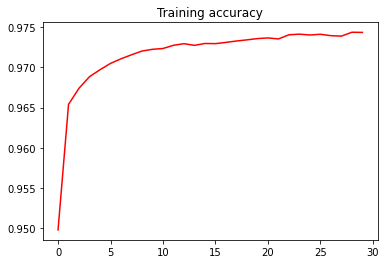

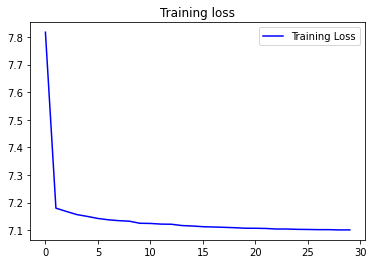

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.savefig('graph_training_acc_96%.png')

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.savefig('graph_training_loss_7.2260.png')
plt.legend()

plt.show()